# An Exploration of the Mandelbrot-Set, Julia-Set and the chaotic Bifurication

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps

## Naive Implementation

In [3]:
def create_mandelbrot(c):
    f = lambda x: x**2 + c
    return f

def stability(number, it):
    return number / it

def run(f, it):
    x = 0
    
    number = 0
    for i in range(it):
        number = i
        x = f(x)
        if abs(x) > 2:
            break
    
    return stability(number, it)


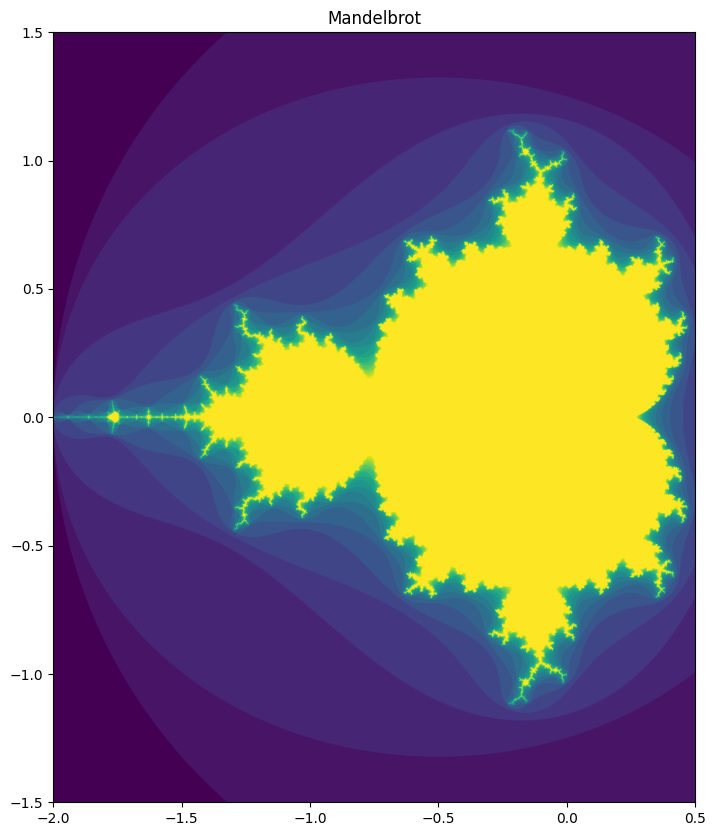

In [5]:
def plot_mandelbrot(r_upper=.5, r_lower=-2, i_upper=1.5, i_lower=-1.5, it=20):
    x = np.arange(r_lower, r_upper, 0.0005)
    y = np.arange(i_lower, i_upper, 0.0005)

    xv, yv = np.meshgrid(x, y)

    complex = xv + yv * 1j

    res = np.zeros(complex.shape)

    for idx, c in np.ndenumerate(complex):
        res[idx] = run(create_mandelbrot(c), it)

    plt.figure(figsize=(15,10))
    plt.imshow(res, extent=[r_lower, r_upper, i_lower, i_upper])
    plt.title("Mandelbrot")
    

plot_mandelbrot()



## Matrix-wise Implementation

In [4]:
R_UPPER = .5
R_LOWER = -2
I_UPPER = 1.3
I_LOWER = -1.3

In [5]:
def mandelbrot(x, c):
    return x**2 + c

def create_grid(stepsize, r_upper=R_UPPER, r_lower=R_LOWER, i_upper=I_UPPER, i_lower=I_LOWER):
    x = np.arange(r_lower, r_upper, stepsize)
    y = np.arange(i_lower, i_upper, stepsize)

    xv, yv = np.meshgrid(x, y)

    return xv + yv * 1j

In [6]:
# it: max number of iterations to run
# sample_step: the sample step size of the grid
def plot_mandelbrot(it, sample_step, cmap="viridis"):
    # to handle overflow of very large numbers
    err_setting = np.seterr(over='ignore', invalid='ignore')
    grid = create_grid(sample_step)

    x = 0
    res = []
    for i in range(it):
        x = mandelbrot(x, grid)

        res.append((np.abs(x) <= 2).astype(int))

    stabil = np.stack(res, axis=0).sum(axis=0)

    plt.figure(figsize=(15,10))
    plt.imshow(stabil, extent=[R_LOWER, R_UPPER, I_LOWER, I_UPPER], cmap=cmap)
    plt.title("Mandelbrot")
    

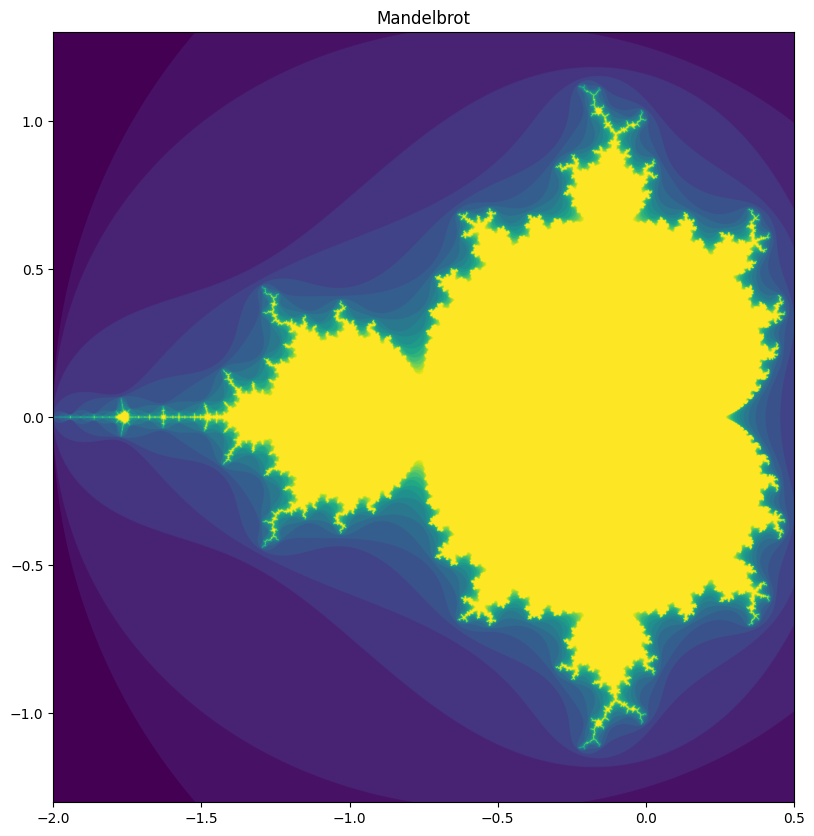

In [9]:
plot_mandelbrot(20, 0.0005)

You can alter the colormap! An Overview of availible maps can you find [here](https://matplotlib.org/stable/users/explain/colors/colormaps.html)

In [10]:
list(colormaps)[5]

'twilight'

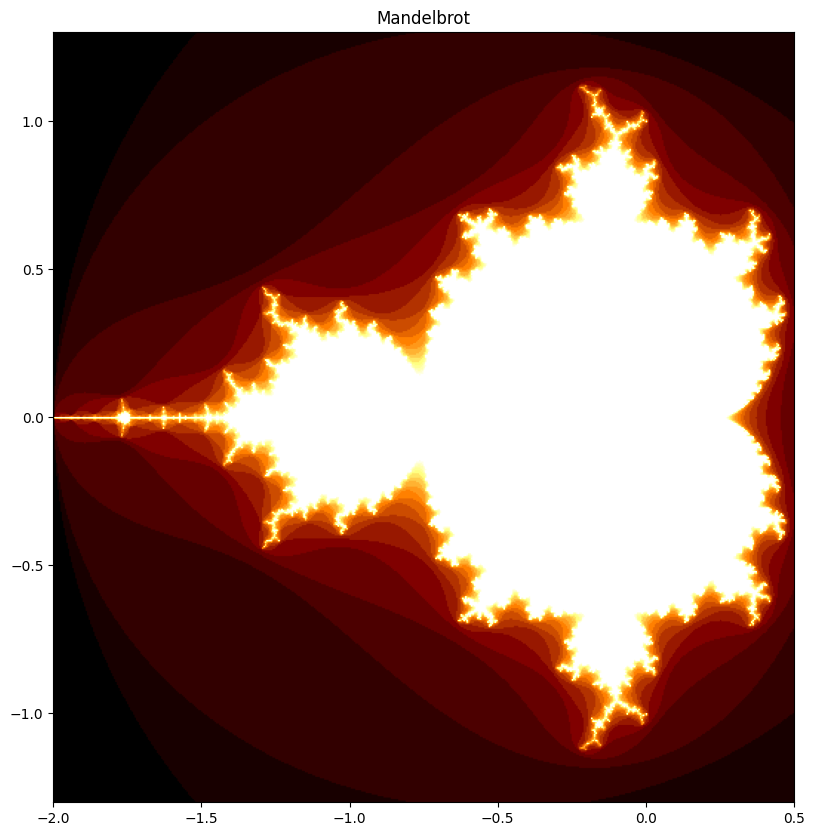

In [11]:
plot_mandelbrot(20, 0.005, "afmhot")

## Julia Set

In [9]:
R_UPPER = 1.5
R_LOWER = -1.5
I_UPPER = 1.5
I_LOWER = -1.5

In [11]:
# it: max number of iterations to run
# sample_step: the sample step size of the grid
def plot_juliaset(it, sample_step, c, cmap="viridis"):
    # to handle overflow of very large numbers
    err_setting = np.seterr(over='ignore', invalid='ignore')
    grid = create_grid(sample_step, r_upper=R_UPPER, r_lower=R_LOWER, i_upper=I_UPPER, i_lower=I_LOWER)
    
    res = []
    for i in range(it):
        grid = mandelbrot(grid, c)

        res.append((np.abs(grid) <= 2).astype(int))

    stabil = np.stack(res, axis=0).sum(axis=0)

    plt.figure(figsize=(15,10))
    plt.imshow(stabil, extent=[R_LOWER, R_UPPER, I_LOWER, I_UPPER], cmap=cmap)
    plt.title("Julia Set for " + str(c))


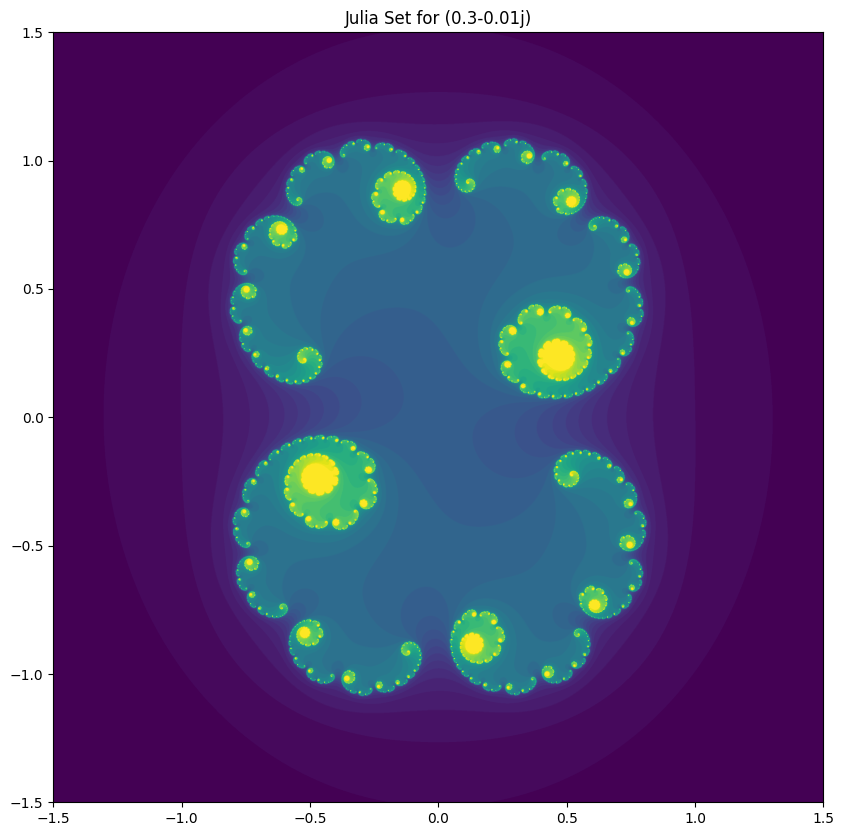

In [12]:
plot_juliaset(40, 0.001, .3-.01j)

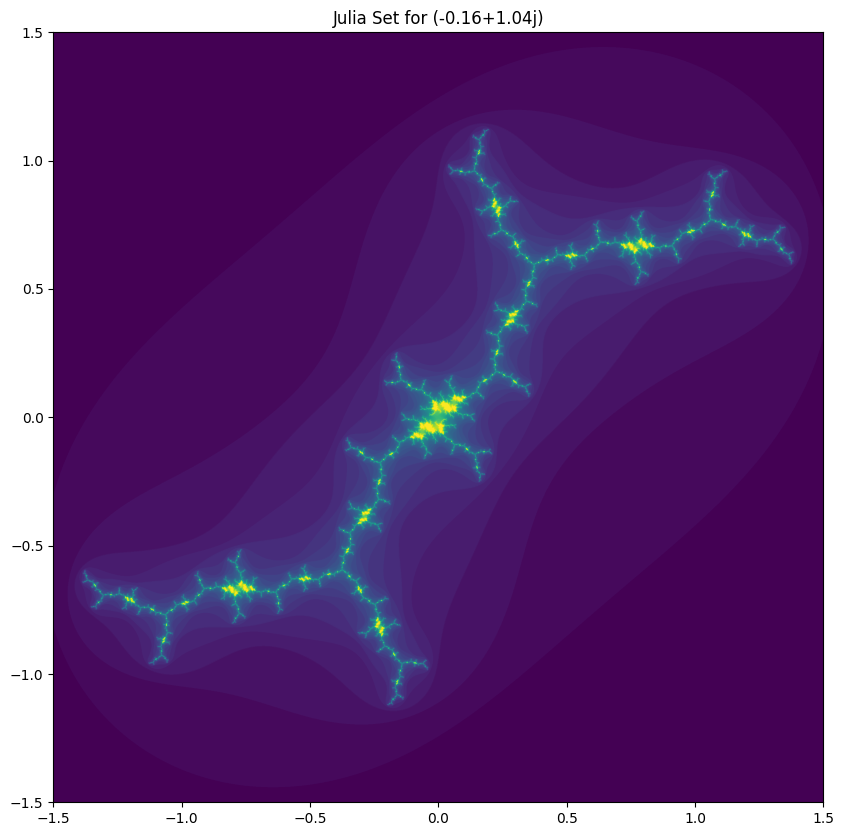

In [13]:
plot_juliaset(40, 0.001, -.16+1.04j)

## Birufication